In [1]:
import pandas as pd
import json
from os import listdir
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("white")

## Load Data + Create Pivots

In [2]:
adult = (pd.read_csv('defaultHEO.csv')
         .drop('Unnamed: 0', axis = 1)
         .assign(eqOp=lambda df: df.eqOpTrue*0.67+df.eqOpFalse*.33,
                eqOpTrain=lambda df: df.eqOpTrue_train*0.67+df.eqOpFalse_train*.33,
                heo_pos_gap_train = lambda df: np.abs(df.hamming_pos_tr_True - df.hamming_pos_tr_False),
                heo_neg_gap_train = lambda df: np.abs(df.hamming_neg_tr_True - df.hamming_neg_tr_False),
                heo_pos_gap = lambda df: np.abs(df.hamming_pos_True - df.hamming_pos_False),
                heo_neg_gap = lambda df: np.abs(df.hamming_neg_True - df.hamming_neg_False),
                ham_gap = lambda df: np.abs(df.hamming_True - df.hamming_False),
                ham_gap_train = lambda df: np.abs(df.hamming_tr_True - df.hamming_tr_False)))

dataset = "Default"
results_path ='default_heo/heo'

In [3]:
adult.columns

Index(['accuracy', 'accuracy_std', 'accuracy_train', 'complexity',
       'complexity_final', 'epsilon', 'eqOpTrue_train', 'eqOpFalse_train',
       'accTrue_train', 'accFalse_train', 'eqOpTrue', 'eqOpFalse', 'accTrue',
       'accFalse', 'hamming', 'hamming_pos', 'hamming_neg', 'hamming_tr',
       'hamming_pos_tr', 'hamming_neg_tr', 'hamming_True', 'hamming_pos_True',
       'hamming_neg_True', 'hamming_tr_True', 'hamming_pos_tr_True',
       'hamming_neg_tr_True', 'hamming_False', 'hamming_pos_False',
       'hamming_neg_False', 'hamming_tr_False', 'hamming_pos_tr_False',
       'hamming_neg_tr_False', 'ip', 'eps_test', 'acc_diff', 'eps_train',
       'acc_diff_train', 'eqOp', 'eqOpTrain', 'heo_pos_gap_train',
       'heo_neg_gap_train', 'heo_pos_gap', 'heo_neg_gap', 'ham_gap',
       'ham_gap_train'],
      dtype='object')

In [4]:
adult_eps = (adult[adult.epsilon > 0]
           .sort_values(by='epsilon', ascending=True)
           .groupby(['epsilon'])
           .agg({"ip": np.min,
                 "eps_test": np.min,
                 "eps_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "hamming": np.min,
                "hamming_tr": np.min,
                "hamming_True": np.min,
                "hamming_False": np.min,
                "hamming_tr_True": np.min,
                "hamming_tr_False": np.min,
                "hamming_pos_tr": np.min,
                "hamming_neg_tr": np.min,
                "hamming_pos": np.min,
                "hamming_neg": np.min,
                "hamming_pos_tr_True": np.min,
                "hamming_neg_tr_True": np.min,
                "hamming_pos_True": np.min,
                "hamming_neg_True": np.min,
                "hamming_pos_tr_False": np.min,
                "hamming_neg_tr_False": np.min,
                "hamming_pos_False": np.min,
                "hamming_neg_False": np.min,
                "heo_pos_gap_train": np.min,
                "heo_neg_gap_train": np.min,
                "heo_pos_gap": np.min,
                "heo_neg_gap": np.min,
                 "ham_gap": np.min,
                 "ham_gap_train": np.min,
                "eqOp": np.min,
                "eqOpTrue": np.min,
                "eqOpFalse": np.min,
                "eqOpTrain": np.min,
                "eqOpTrue_train": np.min,
                "eqOpFalse_train": np.min,
                "accTrue": np.max,
                "accFalse": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax()))

adult_compl = (adult[adult.epsilon > 0]
           .sort_values(by='complexity', ascending=True)
           .groupby(['complexity'])
           .agg({"ip": np.min,
                 "eps_test": np.min,
                 "eps_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "hamming": np.min,
                "hamming_tr": np.min,
                "hamming_True": np.min,
                "hamming_False": np.min,
                "hamming_tr_True": np.min,
                "hamming_tr_False": np.min,
                "hamming_pos_tr": np.min,
                "hamming_neg_tr": np.min,
                "hamming_pos": np.min,
                "hamming_neg": np.min,
                "hamming_pos_tr_True": np.min,
                "hamming_neg_tr_True": np.min,
                "hamming_pos_True": np.min,
                "hamming_neg_True": np.min,
                "hamming_pos_tr_False": np.min,
                "hamming_neg_tr_False": np.min,
                "hamming_pos_False": np.min,
                "hamming_neg_False": np.min,
                "heo_pos_gap_train": np.min,
                "heo_neg_gap_train": np.min,
                "heo_pos_gap": np.min,
                "heo_neg_gap": np.min,
                "ham_gap": np.min,
                 "ham_gap_train": np.min,
                 "eps_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "eqOp": np.min,
                "eqOpTrue": np.min,
                "eqOpFalse": np.min,
                "eqOpTrain": np.min,
                "eqOpTrue_train": np.min,
                "eqOpFalse_train": np.min,
                "accTrue": np.max,
                "accFalse": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax()))

adult_ham_test = (adult
           .sort_values(by='ham_gap', ascending=True)
           .groupby(['ham_gap'])
           .agg({"ip": np.min,
                 "eps_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "hamming": np.min,
                "hamming_tr": np.min,
                "hamming_True": np.min,
                "hamming_False": np.min,
                "hamming_tr_True": np.min,
                "hamming_tr_False": np.min,
                "hamming_pos_tr": np.min,
                "hamming_neg_tr": np.min,
                "hamming_pos": np.min,
                "hamming_neg": np.min,
                "hamming_pos_tr_True": np.min,
                "hamming_neg_tr_True": np.min,
                "hamming_pos_True": np.min,
                "hamming_neg_True": np.min,
                "hamming_pos_tr_False": np.min,
                "hamming_neg_tr_False": np.min,
                "hamming_pos_False": np.min,
                "hamming_neg_False": np.min,
                "heo_pos_gap_train": np.min,
                "heo_neg_gap_train": np.min,
                "heo_pos_gap": np.min,
                "heo_neg_gap": np.min,
                 "ham_gap_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "eqOpTrue": np.min,
                "eqOpFalse": np.min,
                "eqOpTrue_train": np.min,
                "eqOpFalse_train": np.min,
                "accTrue": np.max,
                "accFalse": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax()))

adult_ham_pos_test = (adult
           .sort_values(by='heo_pos_gap', ascending=True)
           .groupby(['heo_pos_gap'])
           .agg({"ip": np.min,
                 "eps_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "hamming": np.min,
                "hamming_tr": np.min,
                "hamming_True": np.min,
                "hamming_False": np.min,
                "hamming_tr_True": np.min,
                "hamming_tr_False": np.min,
                "hamming_pos_tr": np.min,
                "hamming_neg_tr": np.min,
                "hamming_pos": np.min,
                "hamming_neg": np.min,
                "hamming_pos_tr_True": np.min,
                "hamming_neg_tr_True": np.min,
                "hamming_pos_True": np.min,
                "hamming_neg_True": np.min,
                "hamming_pos_tr_False": np.min,
                "hamming_neg_tr_False": np.min,
                "hamming_pos_False": np.min,
                "hamming_neg_False": np.min,
                "heo_pos_gap_train": np.min,
                "heo_neg_gap_train": np.min,
                "heo_neg_gap": np.min,
                 "ham_gap_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "eqOpTrue": np.min,
                "eqOpFalse": np.min,
                "eqOpTrue_train": np.min,
                "eqOpFalse_train": np.min,
                "accTrue": np.max,
                "accFalse": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax()))

adult_ham_neg_test = (adult
           .sort_values(by='heo_neg_gap', ascending=True)
           .groupby(['heo_neg_gap'])
           .agg({"ip": np.min,
                 "eps_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "hamming": np.min,
                "hamming_tr": np.min,
                "hamming_True": np.min,
                "hamming_False": np.min,
                "hamming_tr_True": np.min,
                "hamming_tr_False": np.min,
                "hamming_pos_tr": np.min,
                "hamming_neg_tr": np.min,
                "hamming_pos": np.min,
                "hamming_neg": np.min,
                "hamming_pos_tr_True": np.min,
                "hamming_neg_tr_True": np.min,
                "hamming_pos_True": np.min,
                "hamming_neg_True": np.min,
                "hamming_pos_tr_False": np.min,
                "hamming_neg_tr_False": np.min,
                "hamming_pos_False": np.min,
                "hamming_neg_False": np.min,
                "heo_pos_gap_train": np.min,
                "heo_neg_gap_train": np.min,
                "heo_pos_gap": np.min,
                 "ham_gap_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "eqOpTrue": np.min,
                "eqOpFalse": np.min,
                "eqOpTrue_train": np.min,
                "eqOpFalse_train": np.min,
                "accTrue": np.max,
                "accFalse": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax()))

## Fairness Story

In [5]:
#wide = adult_eps[['epsilon', 'eqOpTrue_train', 'eqOpTrue']].set_index('epsilon')
#sns.lineplot(wide)

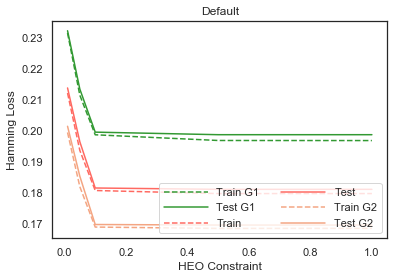

In [6]:
#Good chart
#Throw in population
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming_tr_True', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#329932")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming_True', label = "Test G1")
ax.lines[1].set_color("#329932")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming_tr', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color("#ff6961")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming', label = "Test")
ax.lines[3].set_color("#ff6961")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming_tr_False', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color("#f4a582")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming_False', label = "Test G2")
ax.lines[5].set_color("#f4a582")

ax.legend(frameon=True, loc='lower right',ncol=2,handlelength=4)

sns.mpl.pyplot.xlabel('HEO Constraint')
sns.mpl.pyplot.ylabel('Hamming Loss')
sns.mpl.pyplot.title(dataset)

plt.savefig(results_path+dataset+'_hammingCurve.pdf',dpi=300)

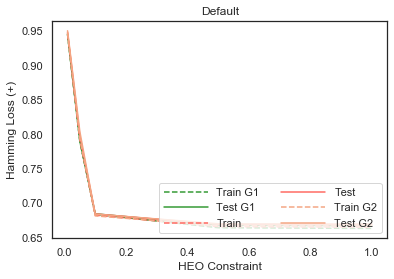

In [7]:
#Good chart
#Throw in population
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming_pos_tr_True', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#329932")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming_pos_True', label = "Test G1")
ax.lines[1].set_color("#329932")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming_pos_tr', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color("#ff6961")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming_pos', label = "Test")
ax.lines[3].set_color("#ff6961")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming_pos_tr_False', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color("#f4a582")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming_pos_False', label = "Test G2")
ax.lines[5].set_color("#f4a582")

ax.legend(frameon=True, loc='lower right',ncol=2,handlelength=4)

sns.mpl.pyplot.xlabel('HEO Constraint')
sns.mpl.pyplot.ylabel('Hamming Loss (+)')
sns.mpl.pyplot.title(dataset)

plt.savefig(results_path+dataset+'_hammingCurvePos.pdf',dpi=300)

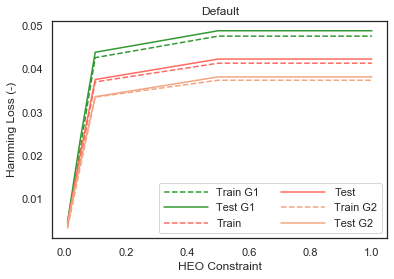

In [8]:
#Good chart
#Throw in population
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming_neg_tr_True', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#329932")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming_neg_True', label = "Test G1")
ax.lines[1].set_color("#329932")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming_neg_tr', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color("#ff6961")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming_neg', label = "Test")
ax.lines[3].set_color("#ff6961")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming_neg_tr_False', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color("#f4a582")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'hamming_neg_False', label = "Test G2")
ax.lines[5].set_color("#f4a582")

ax.legend(frameon=True, loc='lower right',ncol=2,handlelength=4)

sns.mpl.pyplot.xlabel('HEO Constraint')
sns.mpl.pyplot.ylabel('Hamming Loss (-)')
sns.mpl.pyplot.title(dataset)

plt.savefig(results_path+dataset+'_hammingCurveNeg.pdf',dpi=300)

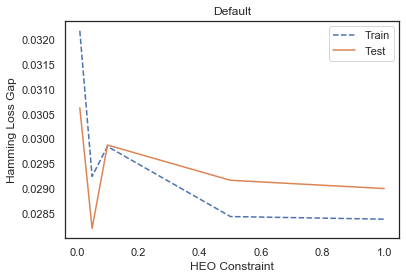

In [9]:
#Good with raw EqOp numbers graph
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'ham_gap_train', label = "Train")
ax.lines[0].set_linestyle("--")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'ham_gap', label = "Test")

sns.mpl.pyplot.xlabel('HEO Constraint')
sns.mpl.pyplot.ylabel('Hamming Loss Gap')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_hamGap.pdf',dpi=300)

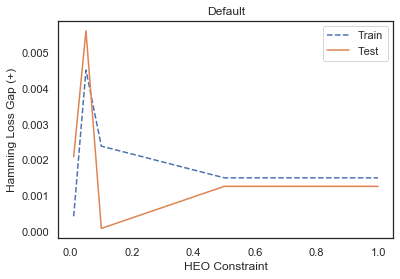

In [10]:
#Good with raw EqOp numbers graph
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'heo_pos_gap_train', label = "Train")
ax.lines[0].set_linestyle("--")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'heo_pos_gap', label = "Test")

sns.mpl.pyplot.xlabel('HEO Constraint')
sns.mpl.pyplot.ylabel('Hamming Loss Gap (+)')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_hamGapPos.pdf',dpi=300)

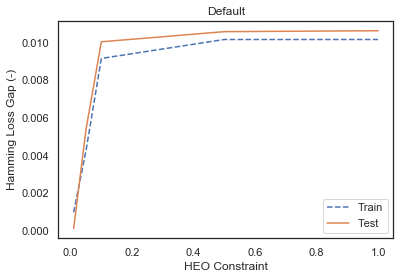

In [11]:
#Good with raw EqOp numbers graph
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'heo_neg_gap_train', label = "Train")
ax.lines[0].set_linestyle("--")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'heo_neg_gap', label = "Test")

sns.mpl.pyplot.xlabel('HEO Constraint')
sns.mpl.pyplot.ylabel('Hamming Loss Gap (-)')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_hamGapNeg.pdf',dpi=300)

## Accuracy Story

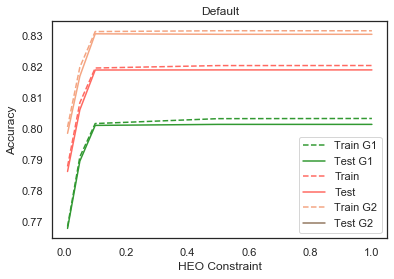

In [12]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#329932")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Test G1")
ax.lines[1].set_color("#329932")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy_train', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color("#ff6961")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy', label = "Test")
ax.lines[3].set_color("#ff6961")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color("#f4a582")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse', label = "Test G2")
ax.lines[5].set_color("#f4a582")

sns.mpl.pyplot.xlabel('HEO Constraint')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracy.pdf',dpi=300)

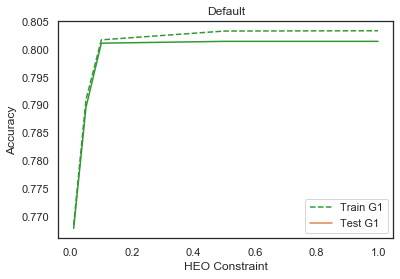

In [13]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#329932")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Test G1")
ax.lines[1].set_color("#329932")

sns.mpl.pyplot.xlabel('HEO Constraint')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyG1.pdf',dpi=300)

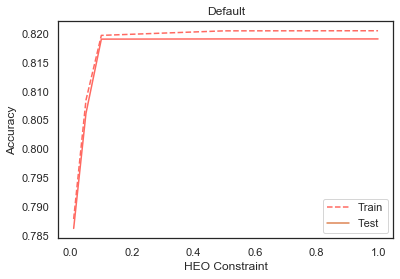

In [14]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy_train', label = "Train")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#ff6961")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy', label = "Test")
ax.lines[1].set_color("#ff6961")

sns.mpl.pyplot.xlabel('HEO Constraint')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyOverall.pdf',dpi=300)

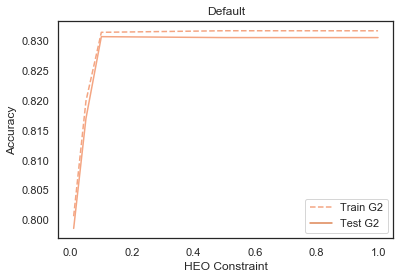

In [15]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Train G2")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#f4a582")

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse', label = "Test G2")
ax.lines[1].set_color("#f4a582")

sns.mpl.pyplot.xlabel('HEO Constraint')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyG2.pdf',dpi=300)

In [16]:
adult_ham_test_full = adult_ham_test.append(pd.DataFrame({'ham_gap':[0,adult_ham_test.ham_gap.min()-0.01], 
                                                          'cumAcc': [0.76, 0.76]}))
adult_ham_pos_test_full = adult_ham_pos_test.append(pd.DataFrame({'heo_pos_gap':[0.2], 
                                                          'cumAcc': [adult_ham_pos_test.cumAcc.max()]}))
adult_ham_neg_test_full = adult_ham_neg_test.append(pd.DataFrame({'heo_neg_gap':[0.2], 
                                                          'cumAcc': [adult_ham_neg_test.cumAcc.max()]}))

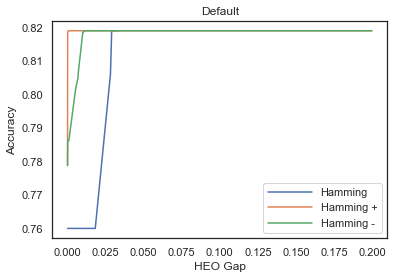

In [17]:
#add std. dev. + complete to trivial
sns.lineplot(data=adult_ham_test_full, x='ham_gap', y = 'cumAcc', label = 'Hamming')
sns.lineplot(data=adult_ham_pos_test_full, x='heo_pos_gap', y = 'cumAcc', label = 'Hamming +')
ax = sns.lineplot(data=adult_ham_neg_test_full, x='heo_neg_gap', y = 'cumAcc', label = 'Hamming -')

sns.mpl.pyplot.xlabel('HEO Gap')
sns.mpl.pyplot.ylabel('Accuracy')
ax.legend(frameon=True, loc='lower right',ncol=1,handlelength=4)

sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyFairTradeOff.pdf',dpi=300)

## Complexity Story

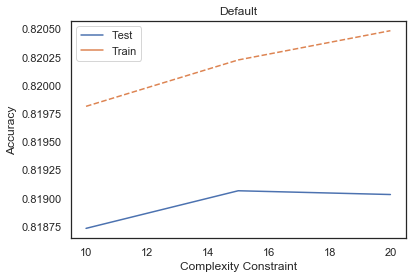

In [18]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy_train', label= 'Train')
ax.lines[1].set_linestyle("--")

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyComplexity.pdf',dpi=300)

Text(0.5, 1.0, 'Default')

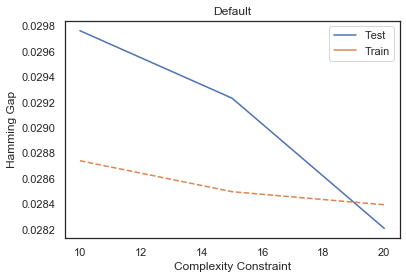

In [19]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'ham_gap', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'ham_gap_train', label= 'Train')
ax.lines[1].set_linestyle("--")

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Hamming Gap')
sns.mpl.pyplot.title(dataset)

Text(0.5, 1.0, 'Default')

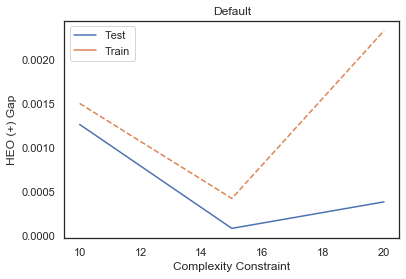

In [20]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'heo_pos_gap', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'heo_pos_gap_train', label= 'Train')
ax.lines[1].set_linestyle("--")

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('HEO (+) Gap')
sns.mpl.pyplot.title(dataset)

Text(0.5, 1.0, 'Default')

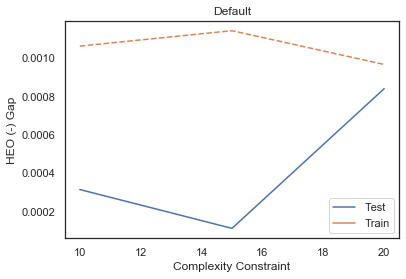

In [21]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'heo_neg_gap', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'heo_neg_gap_train', label= 'Train')
ax.lines[1].set_linestyle("--")

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('HEO (-) Gap')
sns.mpl.pyplot.title(dataset)

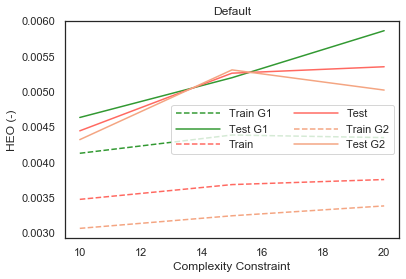

In [22]:
#Good chart
#Throw in population
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming_neg_tr_True', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#329932")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming_neg_True', label = "Test G1")
ax.lines[1].set_color("#329932")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming_neg_tr', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color("#ff6961")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming_neg', label = "Test")
ax.lines[3].set_color("#ff6961")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming_neg_tr_False', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color("#f4a582")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming_neg_False', label = "Test G2")
ax.lines[5].set_color("#f4a582")

ax.legend(frameon=True, loc='center right',ncol=2,handlelength=4)

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('HEO (-)')
sns.mpl.pyplot.title(dataset)

plt.savefig(results_path+dataset+'_heoNegComplexity.pdf',dpi=300)

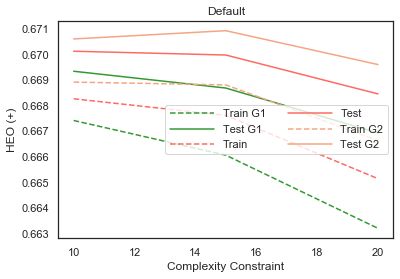

In [23]:
#Good chart
#Throw in population
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming_pos_tr_True', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#329932")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming_pos_True', label = "Test G1")
ax.lines[1].set_color("#329932")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming_pos_tr', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color("#ff6961")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming_pos', label = "Test")
ax.lines[3].set_color("#ff6961")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming_pos_tr_False', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color("#f4a582")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming_pos_False', label = "Test G2")
ax.lines[5].set_color("#f4a582")

ax.legend(frameon=True, loc='center right',ncol=2,handlelength=4)

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('HEO (+)')
sns.mpl.pyplot.title(dataset)

plt.savefig(results_path+dataset+'_heoPosComplexity.pdf',dpi=300)

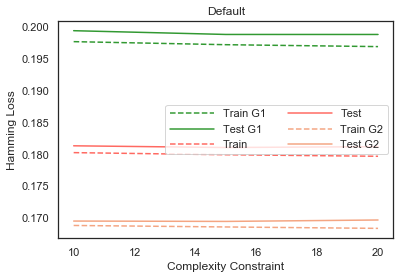

In [24]:
#Good chart
#Throw in population
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming_tr_True', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#329932")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming_True', label = "Test G1")
ax.lines[1].set_color("#329932")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming_tr', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color("#ff6961")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming', label = "Test")
ax.lines[3].set_color("#ff6961")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming_tr_False', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color("#f4a582")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'hamming_False', label = "Test G2")
ax.lines[5].set_color("#f4a582")

ax.legend(frameon=True, loc='center right',ncol=2,handlelength=4)

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Hamming Loss')
sns.mpl.pyplot.title(dataset)

plt.savefig(results_path+dataset+'_hamFullComplexity.pdf',dpi=300)

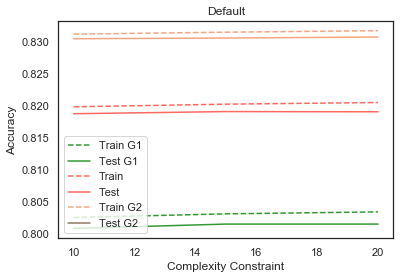

In [25]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#329932")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue', label = "Test G1")
ax.lines[1].set_color("#329932")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy_train', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color("#ff6961")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy', label = "Test")
ax.lines[3].set_color("#ff6961")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse_train', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color("#f4a582")

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse', label = "Test G2")
ax.lines[5].set_color("#f4a582")

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_complexityGroupAccuracy.pdf',dpi=300)

## Comparison Story

In [26]:
benchmarks = (pd.read_csv('benchmark_default_heo.csv')
              .drop('Unnamed: 0', axis=1))

In [27]:
benchmarks.head()

,algo,Accuracy,HamGap,HamGapPos,HamGapNeg,cumAccHamGap,cumAccHamGapPos,cumAccHamGapNeg
0,logreg,0.778767,0.033895,0.0,0.000073,0.778767,0.778767,0.778767
1,logreg,0.778767,0.033895,0.0,0.000073,0.778767,0.778767,0.778767
2,logreg,0.778767,0.033895,0.0,0.000073,0.778767,0.778767,0.778767
3,logreg,0.778767,0.033895,0.0,0.000073,0.778767,0.778767,0.778767
4,logreg,0.778767,0.033895,0.0,0.000073,0.778767,0.778767,0.778767


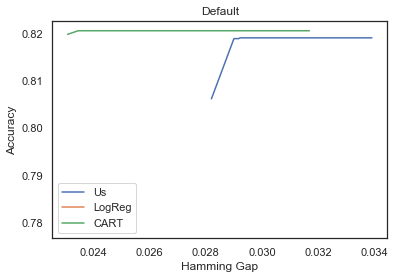

In [28]:
#add std. dev. + complete to trivial

sns.lineplot(data=adult_ham_test, x='ham_gap', y = 'cumAcc', label = 'Us')
sns.lineplot(data=benchmarks[benchmarks.algo == 'logreg'], x='HamGap', y = 'cumAccHamGap', label = 'LogReg')
sns.lineplot(data=benchmarks[benchmarks.algo == 'cart'], x='HamGap', y = 'cumAccHamGap', label = 'CART')
sns.mpl.pyplot.xlabel('Hamming Gap')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_benchmarkHamGap.pdf',dpi=300)

In [29]:
adult_ham_pos_test_full = adult_ham_pos_test.append(pd.DataFrame({'heo_pos_gap':[0.055],
                                                                  'cumAcc': [adult_ham_pos_test.cumAcc.max()]}))
benchmarks_full = benchmarks.append(pd.DataFrame({'algo':['logreg'],
                                                  'cumAccHamGapPos': [0.7787666666666667],
                                                  'HamGapPos':[0.055]}))
benchmarks_full = benchmarks_full.append(pd.DataFrame({'algo':['cart','cart'],
                                                  'cumAccHamGapPos': [0.778767,0.778767],
                                                  'HamGapPos':[0,0.025]}))

In [30]:
benchmarks[benchmarks.algo == 'cart'].HamGapPos.max()

0.05439529942335978

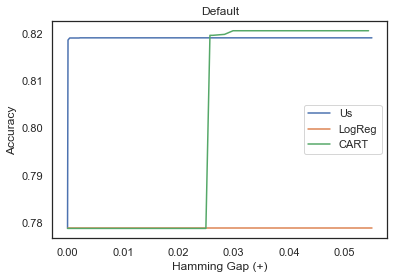

In [31]:
#add std. dev. + complete to trivial

sns.lineplot(data=adult_ham_pos_test_full, x='heo_pos_gap', y = 'cumAcc', label = 'Us')
sns.lineplot(data=benchmarks_full[benchmarks_full.algo == 'logreg'], x='HamGapPos', y = 'cumAccHamGapPos', label = 'LogReg')
sns.lineplot(data=benchmarks_full[benchmarks_full.algo == 'cart'], x='HamGapPos', y = 'cumAccHamGapPos', label = 'CART')
sns.mpl.pyplot.xlabel('Hamming Gap (+)')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_benchmarkHamGapPos.pdf',dpi=300)

In [32]:
adult_ham_neg_test_full = adult_ham_neg_test.append(pd.DataFrame({'heo_neg_gap':[0.024],
                                                                  'cumAcc': [adult_ham_neg_test.cumAcc.max()]}))
benchmarks_full = benchmarks.append(pd.DataFrame({'algo':['logreg'],
                                                  'cumAccHamGapNeg': [0.7787666666666667],
                                                  'HamGapNeg':[0.024]}))
benchmarks_full = benchmarks_full.append(pd.DataFrame({'algo':['cart','cart'],
                                                  'cumAccHamGapNeg': [0.778767,0.778767],
                                                  'HamGapNeg':[0,0.01]}))

In [33]:
benchmarks[benchmarks.algo == 'cart'].HamGapNeg.min()

0.010650909141650854

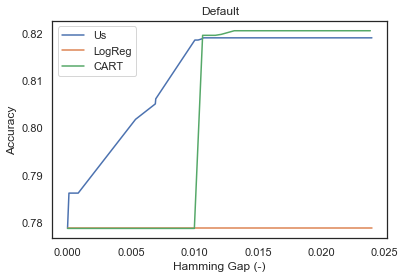

In [34]:
#add std. dev. + complete to trivial

sns.lineplot(data=adult_ham_neg_test_full, x='heo_neg_gap', y = 'cumAcc', label = 'Us')
sns.lineplot(data=benchmarks_full[benchmarks_full.algo == 'logreg'], x='HamGapNeg', y = 'cumAccHamGapNeg', label = 'LogReg')
sns.lineplot(data=benchmarks_full[benchmarks_full.algo == 'cart'], x='HamGapNeg', y = 'cumAccHamGapNeg', label = 'CART')
sns.mpl.pyplot.xlabel('Hamming Gap (-)')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_benchmarkHamGapNeg.pdf',dpi=300)

In [35]:
1/0

ZeroDivisionError: division by zero

# ROUGH

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Positive")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Negative")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy_train', label = "Total")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Accuracy (%)')
plt.savefig("adult_EpsVAccuracy.png")

In [ ]:
#Good with raw EqOp numbers graph
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eps_train', label = "Train")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eps_test', label = "Test")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Equality of Opportunity (%)')
plt.savefig("adult_EpsVEqOp.png")

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse', label = "Negative Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy', label = "Total")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Positive Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue', label = "Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse', label = "Negative Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Equality of Opportunity (%)')

In [ ]:
#Good chart
#Throw in population

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue_train', label = "Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse_train', label = "Negative Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue', label = "Test Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse', label = "Test Negative Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Equality of Opportunity Trrain (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Negative Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Train Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Train")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Test")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Train Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Negative Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Train Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'ip')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Hamming Loss')
plt.savefig("adult_complexVloss.png")

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy_train', label= 'Train')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue', label= 'Test +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse', label= 'Test - ')

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue_train', label= 'Train +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse_train', label= 'Train -')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
#Good chart - tradeoff between interpret. and fairness
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpTrue', label= 'Test +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpFalse', label= 'Test - ')

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpTrue_train', label= 'Train +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpFalse_train', label= 'Train -')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue', label= 'Test +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse', label= 'Test - ')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue_train', label= 'Train +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse_train', label= 'Train -')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy_train', label= 'Train')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'ip')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Hamming Loss')
plt.savefig("adult_complexVloss.png")

In [ ]:
plot = sns.lineplot(data=adult_eps, x='epsilon', y = 'ip')

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Hamming Loss')
plt.savefig("adult_hammingVeps.png")

In [ ]:
plot = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy_train')

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Hamming Loss')
plt.savefig("adult_hammingVeps.png")

In [ ]:
#add std. dev. + complete to trivial
benchmarks = pd.read_csv('benchmark_adult.csv')

sns.lineplot(data=adult_eps_test, x='eps_test', y = 'cumAcc', label = 'Us')
sns.lineplot(data=benchmarks[benchmarks.algo == 'logreg'], x='EqOfOp', y = 'cumAcc', label = 'LogReg')
sns.lineplot(data=benchmarks[benchmarks.algo == 'cart'], x='EqOfOp', y = 'cumAcc', label = 'CART')